# For Imbalanced Dataset 

IN case for classification if you have imbalanced dataset (say one is more than other) then what will we do????

Lets Explore!!!

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42, n_redundant=0,weights=[0.99], n_informative=3) #here weight is used to make the data imbalanced

In [15]:
from collections import Counter

Counter(y)

Counter({np.int64(0): 983, np.int64(1): 17})

<Axes: xlabel='0', ylabel='1'>

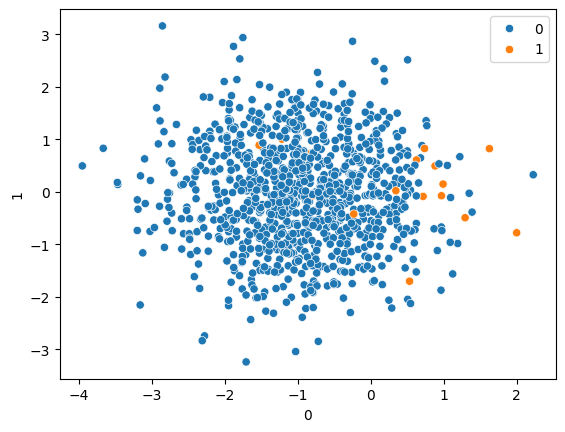

In [16]:
sns.scatterplot(x = pd.DataFrame(X)[0],y= pd.DataFrame(X)[1], hue=y)

here y is less and x has more data points ...hence its an imbalanced data points

In [17]:
#train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
#Hyper parameter tuning
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

class_weight = [{0:w, 1:y} for w in [1, 10, 50, 95,100] for y in [1, 10, 50, 95,100]]

In [21]:
params = dict(penalty=penalty, C=c_values, solver=solver, class_weight=class_weight)
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 95},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 95},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 95},
  {0: 50, 1: 100},
  {0: 95, 1: 1},
  {0: 95, 1: 10},
  {0: 95, 1: 50},
  {0: 95, 1: 95},
  {0: 95, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 95},
  {0: 100, 1: 100}]}

In [22]:
#GRIDSEARCHCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, cv=cv, n_jobs=-1, scoring='accuracy')

In [23]:
grid.fit(X_train, y_train)

e:\CODING\Data Science\DataScience ML Scratch2025\DS from Scratch\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
5000 fits failed out of a total of 9375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
625 fits failed with the following error:
Traceback (most recent call last):
  File "e:\CODING\Data Science\DataScience ML Scratch2025\DS from Scratch\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\CODING\Data Science\DataScience ML Scratch2025\DS from Scratch\myenv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(e

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 95},
                                          {0: 1, 1: 100}, {0: 10, 1: 1},
                                          {0: 10, 1: 10}, {0: 10, 1: 50},
                                          {0: 10, 1: 95}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 95},
                                          {0: 50, 1: 100}, {0: 95, 1: 1},
                                          {0: 95, 1: 10}, {0: 95, 1: 50},
                                          {0: 95, 1: 95}, {0: 95, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 95},
                                          {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [24]:
grid.best_params_

{'C': 0.01, 'class_weight': {0: 50, 1: 95}, 'penalty': 'l2', 'solver': 'sag'}

In [25]:
grid.best_score_

np.float64(0.9893333333333333)

In [26]:
y_pred = grid.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 0.992
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       247
           1       1.00      0.33      0.50         3

    accuracy                           0.99       250
   macro avg       1.00      0.67      0.75       250
weighted avg       0.99      0.99      0.99       250

Confusion Matrix:
 [[247   0]
 [  2   1]]
